In [6]:
import pandas as pd
import numpy as np

data = pd.read_excel("hepatitis_new.xlsx", header=None)
data.drop(0, inplace=True, axis=1)
data.drop(0, inplace=True, axis=0)
data.columns = data.iloc[0]
data.drop(1, inplace=True, axis=0)
data.columns = [c.replace(' ', '_') for c in data.columns]
data = data.replace(to_replace=['no', 'yes'], value=[0, 1])
data.CLASS = data.CLASS.replace(to_replace=['Live', 'Die'], value=[0, 1])
data = data.replace(to_replace=['?'], value=np.nan)
data = data.reset_index()
X_temp = data.drop(columns=['CLASS'])
X_temp

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,NaN,0
1,3,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,NaN,0
2,4,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,NaN,0
3,5,31,0,NaN,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,6,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,200.0,4.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,NaN,242.0,3.3,50.0,1
151,153,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,NaN,1
152,154,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,NaN,1
153,155,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1


In [7]:
X = data.groupby("CLASS").transform(lambda x: x.fillna(x.mean()))
X

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,1,0.000000,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.000000,18.0,4.0,66.571429,0
1,3,50,0,0.000000,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.000000,42.0,3.5,66.571429,0
2,4,78,0,1.000000,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.000000,32.0,4.0,66.571429,0
3,5,31,0,0.540984,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.000000,52.0,4.0,80.000000,0
4,6,34,0,1.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,101.313725,200.0,4.0,66.571429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152,46,0,1.000000,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,122.375000,242.0,3.3,50.000000,1
151,153,44,0,1.000000,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.000000,142.0,4.3,66.571429,1
152,154,61,0,0.000000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.000000,20.0,4.1,66.571429,1
153,155,53,1,0.000000,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.000000,19.0,4.1,48.000000,1


In [8]:
y = data['CLASS'].values
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1], dtype=int64)

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

X = scaler.transform(X)
X

array([[-1.7209121 , -0.89419175,  2.94745653, ...,  0.30720513,
         0.26151157, -0.90748521],
       [-1.69856259,  0.70257923, -0.33927557, ..., -0.48942799,
         0.26151157, -0.90748521],
       [-1.67621309,  2.93805862, -0.33927557, ...,  0.30720513,
         0.26151157, -0.90748521],
       ...,
       [ 1.67621309,  1.58080328, -0.33927557, ...,  0.46653176,
         0.26151157,  1.10194633],
       [ 1.69856259,  0.94209488,  2.94745653, ...,  0.46653176,
        -0.75812043,  1.10194633],
       [ 1.7209121 ,  0.14370939, -0.33927557, ..., -1.1267345 ,
        -1.08753999,  1.10194633]])

In [9]:
from sklearn.preprocessing import normalize
X_scaled = normalize(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,0.017601,0.264015,0.008801,0.000000,0.008801,0.008801,0.008801,0.008801,0.000000,0.008801,0.008801,0.008801,0.008801,0.008801,0.008801,0.748043,0.158409,0.035202,0.585862,0.0
1,0.018274,0.304568,0.000000,0.000000,0.006091,0.000000,0.006091,0.006091,0.000000,0.006091,0.006091,0.006091,0.006091,0.006091,0.005482,0.822333,0.255837,0.021320,0.405510,0.0
2,0.027736,0.540856,0.000000,0.006934,0.006934,0.000000,0.006934,0.006934,0.006934,0.006934,0.006934,0.006934,0.006934,0.006934,0.004854,0.665668,0.221889,0.027736,0.461609,0.0
3,0.045209,0.280296,0.000000,0.004891,0.000000,0.009042,0.009042,0.009042,0.009042,0.009042,0.009042,0.009042,0.009042,0.009042,0.006329,0.415923,0.470174,0.036167,0.723344,0.0
4,0.025374,0.143784,0.000000,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.428449,0.845787,0.016916,0.281526,0.0


In [18]:
X_scaled

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,0.017601,0.264015,0.008801,0.000000,0.008801,0.008801,0.008801,0.008801,0.000000,0.008801,0.008801,0.008801,0.008801,0.008801,0.008801,0.748043,0.158409,0.035202,0.585862,0.000000
1,0.018274,0.304568,0.000000,0.000000,0.006091,0.000000,0.006091,0.006091,0.000000,0.006091,0.006091,0.006091,0.006091,0.006091,0.005482,0.822333,0.255837,0.021320,0.405510,0.000000
2,0.027736,0.540856,0.000000,0.006934,0.006934,0.000000,0.006934,0.006934,0.006934,0.006934,0.006934,0.006934,0.006934,0.006934,0.004854,0.665668,0.221889,0.027736,0.461609,0.000000
3,0.045209,0.280296,0.000000,0.004891,0.000000,0.009042,0.009042,0.009042,0.009042,0.009042,0.009042,0.009042,0.009042,0.009042,0.006329,0.415923,0.470174,0.036167,0.723344,0.000000
4,0.025374,0.143784,0.000000,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.004229,0.428449,0.845787,0.016916,0.281526,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.477491,0.144504,0.000000,0.003141,0.003141,0.000000,0.000000,0.000000,0.003141,0.003141,0.003141,0.000000,0.000000,0.000000,0.023875,0.384428,0.760216,0.010367,0.157069,0.003141
151,0.596247,0.171470,0.000000,0.003897,0.003897,0.000000,0.003897,0.003897,0.003897,0.000000,0.003897,0.003897,0.003897,0.003897,0.003507,0.491027,0.553380,0.016757,0.259432,0.003897
152,0.790865,0.313265,0.000000,0.000000,0.005135,0.000000,0.000000,0.005135,0.000000,0.000000,0.005135,0.000000,0.005135,0.005135,0.004108,0.385162,0.102710,0.021056,0.341877,0.005135
153,0.815936,0.278997,0.005264,0.000000,0.005264,0.000000,0.005264,0.005264,0.005264,0.005264,0.000000,0.000000,0.005264,0.000000,0.007896,0.426392,0.100018,0.021583,0.252677,0.005264


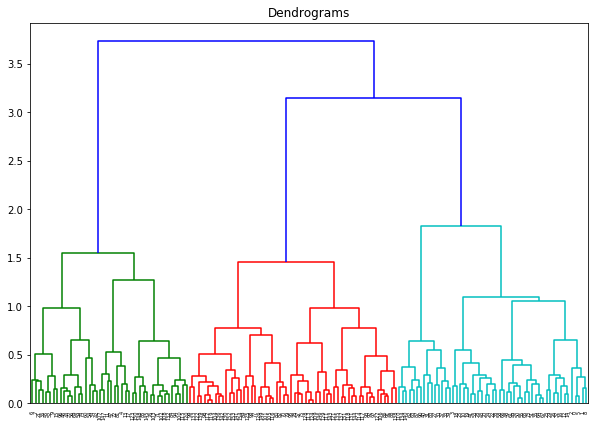

In [10]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

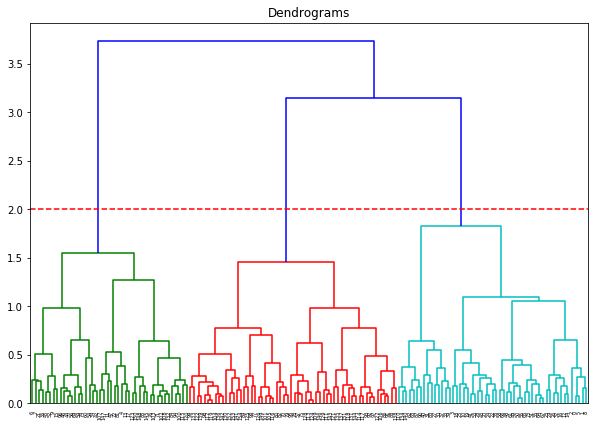

In [12]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_scaled)

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0], dtype=int64)

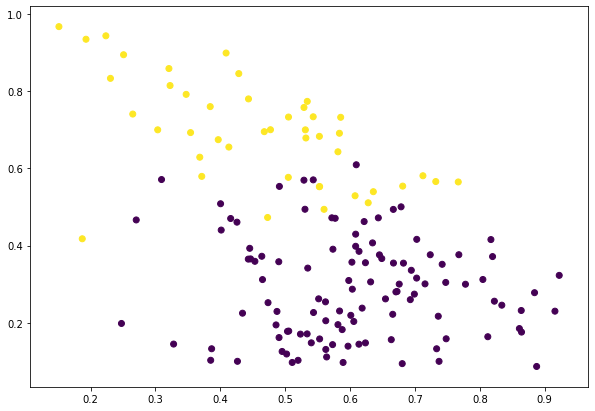

In [14]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_scaled['Alk_Phosphate'], X_scaled['SGOT'], c=cluster.labels_)

In [15]:
# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, cluster.labels_)
error = (1-acc)*100
print("Error: ", error)

Error:  38.70967741935484
